In [1]:
import os
import time
from scipy.io import loadmat
from geostochpy import modfilters
import geostochpy
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

folder='/mnt/c/Users/axlph/OneDrive - Universidad de Concepción/magister/Proyecto de Tesis/Slips/Simulation_8.7/'
# Get a list of all .mat files in the specified folder
mat_files = [f for f in os.listdir(folder) if f.endswith('.mat')]
start_time = time.time()  # Start timing
# Load all .mat files
mat_data = [loadmat(os.path.join(folder, f)) for f in mat_files]
slip_data = [data['slip'] for data in mat_data if 'slip' in data]
slip_data = np.concatenate(slip_data)
end_time = time.time()  # End timing

print(f"Time taken to load all .mat files: {end_time - start_time} seconds")

Time taken to load all .mat files: 185.11204719543457 seconds


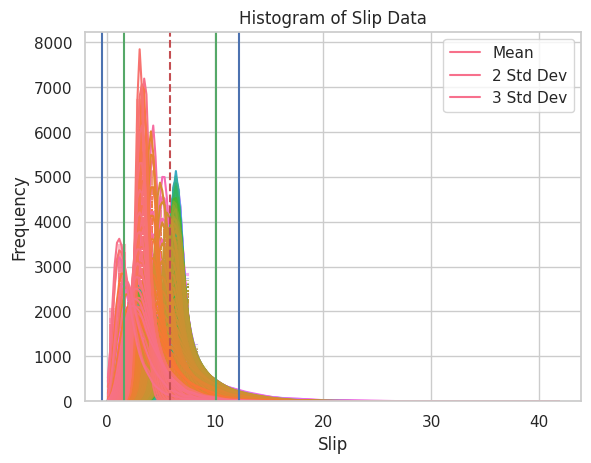

In [2]:
# Set style for seaborn
sns.set(style='whitegrid')

# Create histogram with seaborn
sns.histplot(slip_data, bins=50, kde=True, color='skyblue')

# Calculate relevant statistics
mean = np.mean(slip_data)
std_dev = np.std(slip_data)
min_val = np.min(slip_data)
max_val = np.max(slip_data)
median = np.median(slip_data)
std_dev = np.std(slip_data)

# Write statistics to file
with open(folder+'stats.txt','w') as stats_file:
    stats_file.write(f"Min: {min_val}\n")
    stats_file.write(f"Max: {max_val}\n")
    stats_file.write(f"Mean: {mean}\n")
    stats_file.write(f"Median: {median}\n")
    stats_file.write(f"Standard Deviation: {std_dev}\n")
    stats_file.write("\n")
# Add vertical lines for mean, 2 standard deviations and 3 standard deviations
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(mean - 2*std_dev, color='g', linestyle='-')
plt.axvline(mean + 2*std_dev, color='g', linestyle='-')
plt.axvline(mean - 3*std_dev, color='b', linestyle='-')
plt.axvline(mean + 3*std_dev, color='b', linestyle='-')

# Add legends
plt.legend({'Mean':mean, '2 Std Dev':mean - 2*std_dev, '3 Std Dev':mean - 3*std_dev})

plt.xlabel('Slip')
plt.ylabel('Frequency')
plt.title('Histogram of Slip Data')
plt.show()


In [ ]:
lat_data = [data['lon'] for data in mat_data]
lon_data = [data['lat'].reshape(lat_data[0].shape) for data in mat_data]
depth= [data['depth'.reshape(lat_data[0].shape)] for data in mat_data]